<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ANOVA_%E2%98%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### **1. One Way ANOVA**

##### 문제) 5종류의 수면제 A, B, C, D, E 가 있다. 수면제를 복용한 후 졸음을 느끼기 시작한 시간을 관찰하였다. 다음의 자료에 근거하여 수면제 사이에 졸음을 느끼는 시간이 다르다고 할 수 있는가


            df  sum_sq  mean_sq         F    PR(>F)
Group      4.0  210.64    52.66  7.721408  0.000622
Residual  20.0  136.40     6.82       NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      2.8 0.4588  -2.1424  7.7424  False
     A      C      5.2 0.0362   0.2576 10.1424   True
     A      D      8.2 0.0006   3.2576 13.1424   True
     A      E      1.4 0.9123  -3.5424  6.3424  False
     B      C      2.4 0.6026  -2.5424  7.3424  False
     B      D      5.4  0.028   0.4576 10.3424   True
     B      E     -1.4 0.9123  -6.3424  3.5424  False
     C      D      3.0 0.3921  -1.9424  7.9424  False
     C      E     -3.8 0.1857  -8.7424  1.1424  False
     D      E     -6.8 0.0043 -11.7424 -1.8576   True
-----------------------------------------------------


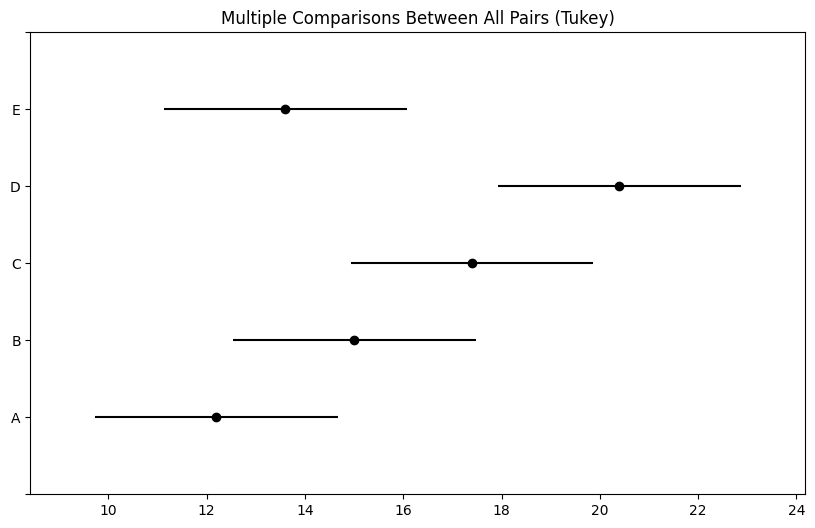

In [12]:
df = pd.DataFrame({
    'A' : [9,10,15,14,13] ,
    'B' : [11,16,12,18,18] ,
    'C' : [13,18,18,19,19] ,
    'D' : [18,20,22,19,23] ,
    'E' : [17,12,13,15,11]
})


# 분석을 위해 pivoting
df1 = df.melt(var_name= 'Group', value_name= 'dose')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# y ~ 그룹
model = ols('dose ~ Group', data = df1).fit()
print(sm.stats.anova_lm(model))

tukey = pairwise_tukeyhsd(df1['dose'] , df1['Group'])
print(tukey)

tukey.plot_simultaneous()
plt.show()

#### 문제2)
네 집단 간 평균 점수가 같은지 가설검정하시오. 평균 점수가 같지 않다면 어느 집단 간에 차이가 있는지를 함께 검정하시오. (유의수준 0.05)

0.002175486114794491
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A1     A2   2.1667  0.713   -3.518  7.8513  False
    A1     A3      6.0 0.0363   0.3153 11.6847   True
    A1     A4     -3.0  0.469  -8.6847  2.6847  False
    A2     A3   3.8333 0.2647  -1.8513   9.518  False
    A2     A4  -5.1667 0.0831 -10.8513   0.518  False
    A3     A4     -9.0 0.0014 -14.6847 -3.3153   True
-----------------------------------------------------


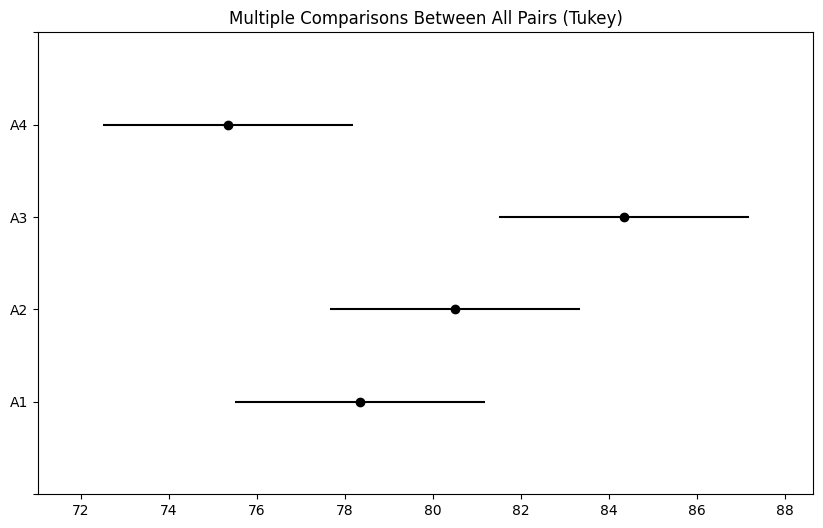

In [13]:
from statsmodels.stats.oneway import anova_oneway
from scipy.stats import f_oneway

df = pd.DataFrame({"A1" : [76, 80, 78, 79, 83, 74],
                     "A2" : [82, 75, 83, 78, 85, 80],
                     "A3" : [79, 87, 88, 86, 84, 82],
                     "A4" : [81, 74, 76, 78, 73, 70]})

melt = df.melt()

oa = anova_oneway(data = melt['value'],
                  groups = melt['variable'],
                  use_var = 'equal')

print(oa.pvalue)

tukey = pairwise_tukeyhsd(melt['value'], melt['variable'])
print(tukey)
tukey.plot_simultaneous()
plt.show()

#### 문제3)
아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')
df.head()

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693


            df      sum_sq    mean_sq          F    PR(>F)
name       3.0  236.534027  78.844676  24.976953  0.000003
Residual  16.0   50.507154   3.156697        NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   5.3934  0.001   2.1785  8.6083   True
     A      C  -4.2156 0.0085  -7.4305 -1.0007   True
     A      D  -0.7086 0.9207  -3.9235  2.5063  False
     B      C   -9.609    0.0 -12.8239 -6.3941   True
     B      D   -6.102 0.0003  -9.3169 -2.8871   True
     C      D    3.507 0.0302   0.2921  6.7219   True
-----------------------------------------------------


<Figure size 1000x400 with 0 Axes>

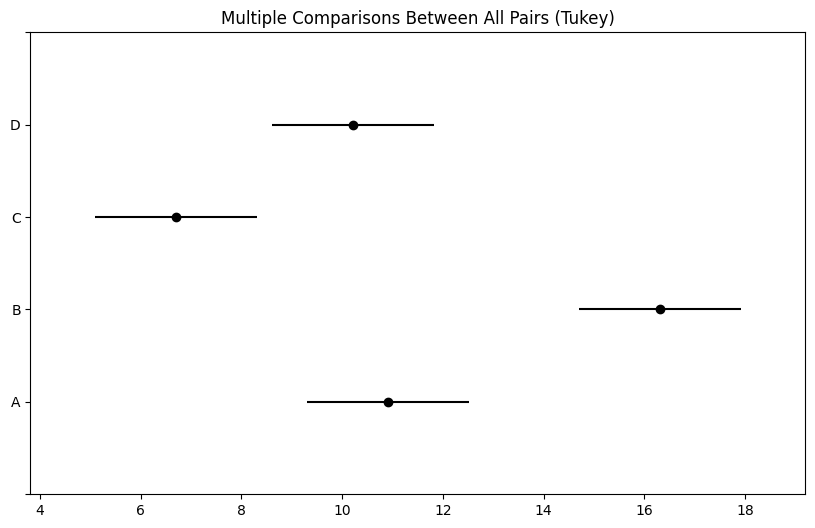

In [15]:
g = [ group['ratio'] for name, group in df.groupby('name')]
f_oneway(*g).pvalue

## ols는 분산 분석표가 나옴
model = ols('ratio~name', data =df).fit()
print(sm.stats.anova_lm(model))

tukey = pairwise_tukeyhsd(df['ratio'], df['name'], alpha = 0.05)
print(tukey.summary())

#그림
plt.figure(figsize = (10, 4))
tukey.plot_simultaneous()
plt.show()

##### **One Way ANOVA -비모수 : kruskal-dunn test**

In [16]:
from scipy.stats import kruskal
df = sm.datasets.get_rdataset("airquality").data.dropna(subset=["Ozone", "Month"])
df["Month"] = df["Month"].astype(str)
df.head(4)


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4


  Month  Shapiro Pvalue  Deicison
0     5        0.000008  정규분포가아니다
1     6        0.062800    정규분포이다
2     7        0.866886    정규분포이다
3     8        0.090325    정규분포이다
4     9        0.000043  정규분포가아니다
6.900714118546782e-06
          5         6         7         8         9
5  1.000000  1.000000  0.000099  0.000358  1.000000
6  1.000000  1.000000  0.248190  0.414864  1.000000
7  0.000099  0.248190  1.000000  1.000000  0.012945
8  0.000358  0.414864  1.000000  1.000000  0.034687
9  1.000000  1.000000  0.012945  0.034687  1.000000


<Axes: xlabel='Month', ylabel='Ozone'>

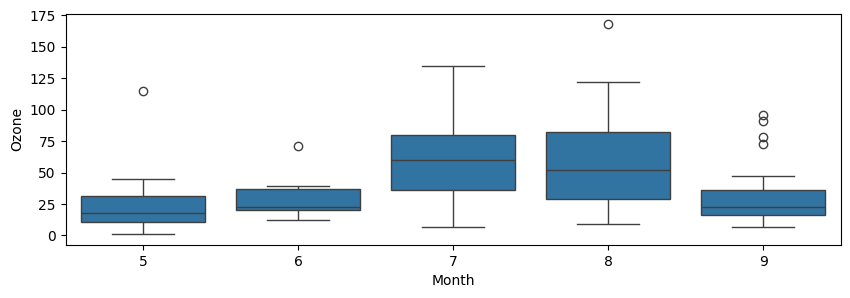

In [17]:
# 분석) Month별 Ozone에 대한 비모수 일원분산분석
!pip install scikit-posthocs
import scikit_posthocs as sp
from scipy.stats import shapiro, levene
# 1) 정규성
res = []
for month in df['Month'].unique() :
  stat, p_val = shapiro(df[df['Month']== month]['Ozone'])
  res.append({
      'Month' : month,
      'Shapiro Pvalue' : p_val,
      'Deicison' : '정규분포이다' if p_val >0.05 else '정규분포가아니다'

  })

print(pd.DataFrame(res))

# 2) Kruskal
g =[group['Ozone'] for name, group in df.groupby('Month')]
print(f'{kruskal(*g).pvalue}')

# 3) Dunns` Test (사후분석)
dunn_result = sp.posthoc_dunn(df, val_col = 'Ozone' , group_col = 'Month', p_adjust ='bonferroni')
print(dunn_result)

# 4). Boxplot 시각화 (Tukey의 plot_simultaneous 대체)
plt.figure(figsize=(10, 3))
sns.boxplot(data =df, x = 'Month', y ='Ozone')

##### **2.Repeated Measures ANOVA (짝지은 ANOVA)**
- 같은 실험 대상에게 여러 조건을 반복 측정 (e.g.시간 경과, 치료 전/후, 여러 조건 등)

- 같은 사람에게 A,B,C약을 순서대로 복용시키고 전,후반응 측정

[등분산 검정을 하지 않은 이유]
* 동일한 집단에 여러 조건을 처리하기 때문에, 집단간 분산이 중요하지 않고, 즉정간 공분산이 중요함

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/doeungim/ADP_DE2/refs/heads/main/dataset/Repeated%20Measures%20ANOVA.csv')
df.head(3)

,Subject,Drug,Time,Score
0,1,A,Pre,51.490142
1,1,A,Post,54.585207
2,1,B,Pre,56.943066


          조합  Shapiro Pvalue Shapiro Decision
0  (A, Post)        0.300697           정규분포이다
1   (A, Pre)        0.315455           정규분포이다
2  (B, Post)        0.703582           정규분포이다
3   (B, Pre)        0.998977           정규분포이다
4  (C, Post)        0.845133           정규분포이다
5   (C, Pre)        0.855412           정규분포이다
                 Anova
          F Value  Num DF  Den DF Pr > F
----------------------------------------
Drug       78.5250 2.0000 38.0000 0.0000
Time      124.7940 1.0000 19.0000 0.0000
Drug:Time   1.0263 2.0000 38.0000 0.3681


귀무가설 : 약물 종류에 따라 시간에 따른 변화량은 동일하다.
대립가설 : 약물 종류에 따라 시간에 따른 변화량은




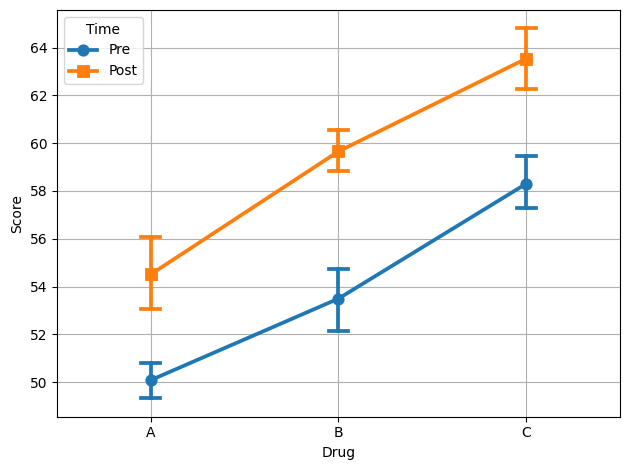

In [41]:


# 20의 Subject에게 약물 A,B,C를 시간 Pre/Post로 두번씩 복용하게 시킴

# 1. 정규성 검정
from statsmodels.stats.anova import AnovaRM
cols = ['Drug','Time']
res = []

for key, group in df.groupby(cols) :
  stat, p = shapiro(group['Score'])
  decision = '정규분포이다' if p > 0.05 else '정규분포가 아니다'
  res.append({
      '조합' : key,
      'Shapiro Pvalue' : p,
      'Shapiro Decision' : decision
  })

print(pd.DataFrame(res))

# 2. 반복측정 ANVOA
model = AnovaRM(df, depvar= 'Score' , subject= 'Subject', within= ['Drug','Time']).fit()
print(model)
print('''
귀무가설 : 약물 종류에 따라 시간에 따른 변화량은 동일하다.
대립가설 : 약물 종류에 따라 시간에 따른 변화량은

''')

# 3. 사후검정: Drug + Time 조합을 하나의 그룹으로 보고 pairwise 비교
df['Group'] = df['Drug'].astype(str) + '_' + df['Time'].astype(str)
tukey = pairwise_tukeyhsd(endog=df['Score'], groups=df['Group'], alpha=0.05)

# 4. 시각화: 약물과 시간에 따른 평균 점수 비교
sns.pointplot(data = df,
              x = 'Drug' , y = 'Score', hue = 'Time', markers=['o', 's'], capsize=0.1)
plt.grid(True)
plt.tight_layout()
plt.show()

##### **짝지은 분산분석 비모수- Friedman**
- 3시점 이상의 반복 측정 OR 짝지은 자료비교
- 순위가 있는 대응표본 3집단
- 귀무가설 : 모든 시간점의 분포가 동일하다

In [19]:
# 분석 목적: 동일한 참가자(30명)를 대상으로 3시점(T1, T2, T3)의 점수 차이 비교
# 데이터 예시: 한 집단의 사전-중간-사후 점수
from scipy.stats import friedmanchisquare

# 문제에서 제시된 표
data = pd.DataFrame(
    {'구분' : ['양식', '중식','한식'],
     'A' : [1,1,2] ,
     'B' : [3,3,3] ,
     "C" : [1,3,3] ,
     "D" : [3,1,3] ,
     "E" : [1,1,1]
     }).set_index('구분')
display(data)
# 귀무 : 음식 종류에 대한 선호도 차이는 없다.
# 대립 : 적어도 하나의 음식에 대한 선호도 차이는 있다.
W = [1,3,1,3,1]
K = [1,3,3,1,1]
C = [2,3,3,3,1]
from scipy.stats import friedmanchisquare
fstat, p = friedmanchisquare(W, K, C)
print(p)



,A,B,C,D,E
구분,,,,,
양식,1,3,1,3,1
중식,1,3,3,1,1
한식,2,3,3,3,1


0.2635971381157259


      차량 A  차량 B  차량 C
피험자1     4     1     6
피험자2     3     4     6
피험자3     2     4     6
피험자4     4     3     2
피험자5     4     1     6
피험자6     6     4     2
피험자7     5     3     5
피험자8     6     3     2
피험자9     2     4     6
0.8668778997501834
          0         1         2
0  1.000000  0.687513  0.884741
1  0.687513  1.000000  0.397199
2  0.884741  0.397199  1.000000
          차량 A      차량 B      차량 C
차량 A  1.000000  0.656077  1.000000
차량 B  0.656077  1.000000  0.167109
차량 C  1.000000  0.167109  1.000000


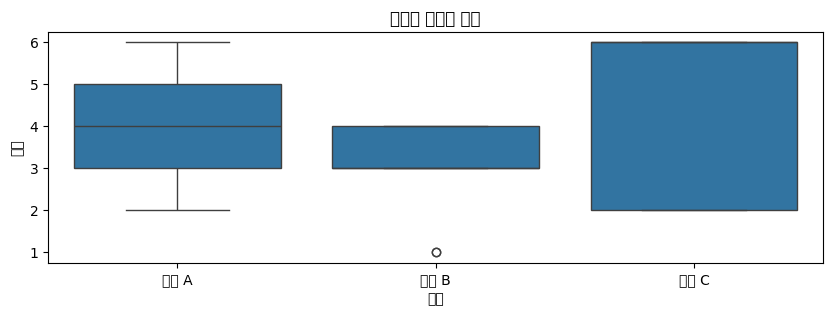

In [20]:
# 데이터 정의
data = {
    '차량 A': [4, 3, 2, 4, 4, 6, 5, 6, 2],
    '차량 B': [1, 4, 4, 3, 1, 4, 3, 3, 4],
    '차량 C': [6, 6, 6, 2, 6, 2, 5, 2, 6]
}
# 인덱스 정의
index = ['피험자1', '피험자2', '피험자3', '피험자4', '피험자5', '피험자6', '피험자7', '피험자8', '피험자9']

# DataFrame 생성
df = pd.DataFrame(data, index=index)

# 출력
print(df)
df2 = df.reset_index(drop = 'index')
stat , p = friedmanchisquare(df2.values[0] , df2.values[1], df2.values[2])
print(p)
# 사후분석 -Friedman : Nemenyi Test - value로 검정
post = sp.posthoc_nemenyi_friedman(df.values)
print(post)

# 사후분석 Dunn - metling 데이터 사용
df_melt = df.melt(var_name = '차량', value_name ='점수')
dunn = sp.posthoc_dunn(df_melt, val_col = '점수', group_col ='차량', p_adjust ='bonferroni')
print(dunn)

df_melted = df.melt(var_name='차량', value_name='점수')
plt.figure(figsize=(10,3))
sns.boxplot(data=df_melted, x='차량', y='점수')
plt.title('차량별 만족도 분포')
plt.show()

#### **3. Two Way ANOVA**
1. 정규성검정 - 각 요인의 조합(A, B라는 두 요인이 있다면 → A × B의 모든 조합 (a1, b1), (a1, b2), ...에 대해 Y가 정규분포를 따라야 함)
2. 등분산 검정 - 각 요인의 조합으로 등분산을 검정
3. 분산분석
4. 교호작용 시각화
5. 사후분석

       조합  Shapiro pvalue                         Shapiro Decision  \
0  (1, 8)             NaN  Insufficient data for Shapiro-Wilk test   

   Levene pvalue Levene Decision  
0       0.040861        등분산이 아니다  

 전제 조건(정규성, 등분산성)**이 충족되지 않았기 때문에 비모수 검정을 고려하는 것이 적절
해결방안
1. 변환으로 가정 충족 시도 log변환해보기
2. 비모수적 요인 설계 - 분포 가정을 최소화 하여

                  df       sum_sq          H     p-unc
C(am)            1.0     6.057672   0.068837  0.793037
C(cyl)           2.0   899.486589  10.221439  0.006032
C(interaction)   5.0  2300.645833  26.143703  0.000084
Residual        26.0   423.854167   4.816525  0.999998
# 사후검정 결과 (Mann–Whitney + Bonferroni 보정):
   Group1 Group2   p-value  p-adj (Bonferroni)
6     1_4    0_8  0.000244            0.003655
5     1_4    0_6  0.010571            0.158561
2     1_6    0_8  0.011319            0.169781
12    0_8    0_4  0.011392            0.170884
0     1_6    1_4  0.018365            0.275478
9     0_6    0_8  0.020933            0.313997
8     1_4    1_8  0.049491 

<Figure size 800x600 with 0 Axes>

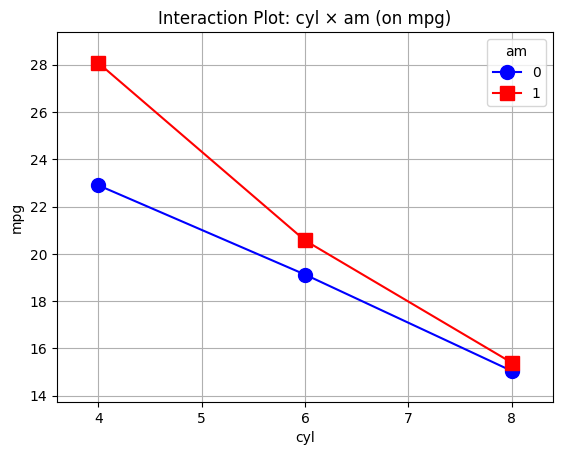

In [23]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head()

# am, cyl 별 mpg 값의 차이 - 요인 2개, 종속변수 1개 [비모수가정]
# 1) 정규성/등분산검정
from scipy.stats import shapiro, levene
cols = ['am' , 'cyl']

result = []
for key, group in df.groupby(cols) :
  if len(group) >= 3:
    stat , p = shapiro(group['mpg'])
    decision = '정규분포가 아니다' if p < 0.05 else '정규분포이다'
  else:
    stat, p = float('nan'), float('nan')
    decision = 'Insufficient data for Shapiro-Wilk test'


g = [group['mpg'] for name, group in df.groupby(cols) if len(group) > 1 ]
if len(g) > 1:
    stat, p_val = levene(* g)
    l_decision = '등분산이 아니다' if p_val < 0.05 else '등분산'
else:
    stat, p_val = float('nan'), float('nan')
    l_decision = 'Insufficient data for Levene test'


result.append({
    '조합' : key,
    'Shapiro pvalue' : p,
    'Shapiro Decision' : decision,
    'Levene pvalue' : p_val ,
    'Levene Decision' : l_decision
})


print(pd.DataFrame(result))
print('''
 전제 조건(정규성, 등분산성)**이 충족되지 않았기 때문에 비모수 검정을 고려하는 것이 적절
해결방안
1. 변환으로 가정 충족 시도 log변환해보기
2. 비모수적 요인 설계 - 분포 가정을 최소화 하여
''')
#!pip install pingouin
from scipy.stats import kruskal
from statsmodels.api import stats as sm_stats
import scipy.stats as stats

def scheirer_ray_hare(data, dv, factor1, factor2):
    # Step 1: 전체 rank 변환
    data = data.copy()
    data['rank'] = stats.rankdata(data[dv])

    # Step 2: 요인별 교호작용 변수 생성
    data['interaction'] = data[factor1].astype(str) + '_' + data[factor2].astype(str)

    # Step 3: 각 요인에 대해 ANOVA
    formula = 'rank ~ C({}) + C({}) + C(interaction)'.format(factor1, factor2)
    model = ols(formula, data=data).fit()
    anova_table = sm_stats.anova_lm(model, typ=2)

    # Step 4: H값 계산 (ANOVA SS를 기반으로)
    anova_table['H'] = (12 / (len(data) * (len(data)+1))) * anova_table['sum_sq']
    anova_table['p-unc'] = 1 - stats.chi2.cdf(anova_table['H'], anova_table['df'])

    return anova_table[['df', 'sum_sq', 'H', 'p-unc']]

# Clear the variable C from the environment to avoid conflict with patsy's C()
if 'C' in globals():
    del C

result = scheirer_ray_hare(df, dv='mpg', factor1='am', factor2='cyl')
print(result)



## 사후검정은 요인 조합별로 Mann–Whitney U test
from itertools import combinations
from scipy.stats import mannwhitneyu
# 조합 변수 생성
df['group'] = df['am'].astype(str) + '_' + df['cyl'].astype(str)

# 모든 조합 추출
groups = df['group'].unique()
pairs = list(combinations(groups, 2))

# 사후검정 결과 저장
posthoc = []
for g1, g2 in pairs:
    data1 = df[df['group'] == g1]['mpg']
    data2 = df[df['group'] == g2]['mpg']

    if len(data1) >= 2 and len(data2) >= 2:  # 샘플 수 최소 조건
        stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
        posthoc.append({'Group1': g1, 'Group2': g2, 'p-value': p})

# DataFrame 변환 + Bonferroni 보정
posthoc_df = pd.DataFrame(posthoc)
posthoc_df['p-adj (Bonferroni)'] = posthoc_df['p-value'] * len(posthoc_df)
posthoc_df['p-adj (Bonferroni)'] = posthoc_df['p-adj (Bonferroni)'].clip(upper=1.0)

print("# 사후검정 결과 (Mann–Whitney + Bonferroni 보정):")
print(posthoc_df.sort_values('p-adj (Bonferroni)'))

# 교호작용
from statsmodels.graphics.factorplots import interaction_plot

plt.figure(figsize=(8, 6))
interaction_plot(df['cyl'], df['am'], df['mpg'],
                 markers=['o', 's'], colors=['blue', 'red'], ms=10)
plt.title('Interaction Plot: cyl × am (on mpg)')
plt.xlabel('cyl')
plt.ylabel('mpg')
plt.grid(True)

                   sum_sq    df           F        PR(>F)
Intercept     1573.230000   1.0  171.104001  6.057324e-13
C(cyl)         167.709868   2.0    9.120036  9.978097e-04
C(am)           58.430455   1.0    6.354878  1.817605e-02
C(cyl):C(am)    25.436511   2.0    1.383233  2.686140e-01
Residual       239.059167  26.0         NaN           NaN

주효과 검정
1. cyl
  귀무가설 : cyl에 따른 평균 mpg에 차이가 없다.
  대립가설 : cyl에 따른 평균 mpg에 차아가 있다.

2. am
  귀무가설 : am에 따른 평균 mpg에 차이가 없다.
  대립가설 : am에 따른 평균 mpg에 차아가 있다.

3. 교호작용
  귀무가설 : cyl과 am간 교호작용이 없다.
  대립가설 : cyl과 am간 교호작용이 있다. [한 요인의 효과가 다른 요인 수준에 따라 달라짐]



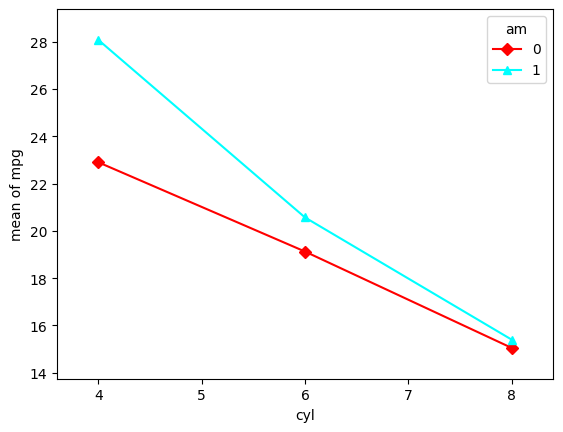


  해석 - 선이 서로 교차하거나 기울기가 다르면 > 교호작용 있음
         선이 평행하면> 교호작용 없음

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   4_0    4_1    5.175 0.1547  -1.1323 11.4823  False
   4_0    6_0   -3.775 0.5872 -10.8906  3.3406  False
   4_0    6_1  -2.3333 0.9315  -9.9402  5.2735  False
   4_0    8_0    -7.85 0.0054 -13.8638 -1.8362   True
   4_0    8_1     -7.5 0.1073 -16.0047  1.0047  False
   4_1    6_0    -8.95 0.0007 -14.6552 -3.2448   True
   4_1    6_1  -7.5083 0.0129 -13.8156 -1.2011   True
   4_1    8_0  -13.025    0.0 -17.2774 -8.7726   True
   4_1    8_1  -12.675 0.0002 -20.0403 -5.3097   True
   6_0    6_1   1.4417 0.9883  -5.6739  8.5572  False
   6_0    8_0   -4.075 0.2192  -9.4539  1.3039  False
   6_0    8_1   -3.725 0.7159 -11.7933  4.3433  False
   6_1    8_0  -5.5167 0.0859 -11.5304  0.4971  False
   6_1    8_1  -5.1667 0.4437 -13.6714  3.3381  False
   8_0    8_1   

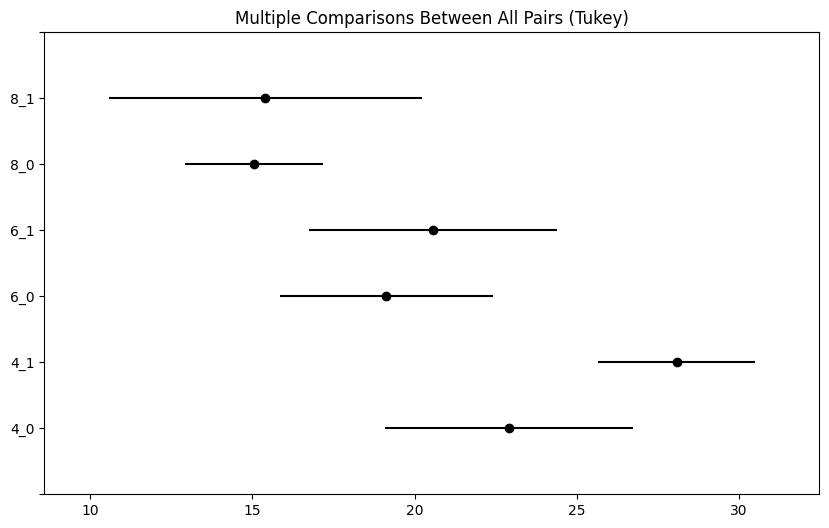

In [24]:
# 3) 분산분석 - 정규성이고, 불균형이라고 조건을 만족할때
## 중요 포인트)
# typ = 2 : 교호작용없이 주효과의 순수 기여만 계산
# typ = 3 : 교호작용 포함 시, 적합 범주형은 반드시 c()로 명시 필요

f = 'mpg ~ C(cyl) * C(am)'
model = ols(f, data = df).fit()
anov = anova_lm(model, typ = 3)
print(anov)

print('''
주효과 검정
1. cyl
  귀무가설 : cyl에 따른 평균 mpg에 차이가 없다.
  대립가설 : cyl에 따른 평균 mpg에 차아가 있다.

2. am
  귀무가설 : am에 따른 평균 mpg에 차이가 없다.
  대립가설 : am에 따른 평균 mpg에 차아가 있다.

3. 교호작용
  귀무가설 : cyl과 am간 교호작용이 없다.
  대립가설 : cyl과 am간 교호작용이 있다. [한 요인의 효과가 다른 요인 수준에 따라 달라짐]
''')

# 4.교호작용 확인
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(df['cyl'] , df['am'] , df['mpg'], markers=['D', '^'])
plt.show()
print('''
  해석 - 선이 서로 교차하거나 기울기가 다르면 > 교호작용 있음
         선이 평행하면> 교호작용 없음
''')

# 5. 사후분석 (Tukey`s HSD)
# 교호작용이 유의할떄에는 따로 해석하지 않기/ 반드시 (cyl + am 그룹)기준으로 해석

# tukey = pairwise_tukeyhsd(df['mpg'], df['am'], alpha = 0.05 )

df['group'] = df['cyl'].astype(str) + '_' + df['am'].astype(str)
tukey_interaction = pairwise_tukeyhsd(df['mpg'], df['group'], alpha = 0.05)
print(tukey_interaction)
tukey_interaction.plot_simultaneous()
plt.show()

##### **4.Type에 따른 ANOVA 분석 방법**
1. Type 1 : 변수와의 상호작용 고려 X , 변수의 순서가 중요한 경우

2. Type 2 : 변수를 추가할떄 상호작용을 고려

3. Type 3 : 이미 추가된 변수, 상호작용 및 다른 변수의 존재여부를 모두 고려 </br>
[비균형설계자료] - 집단별 표본수가 동일하지 않을때

4.그럼 언제 Type 3 VS 비모수대안? </br>
Step 1. 설계가 비균형한가? → Yes </br>
Step 2. 정규성, 등분산 만족하는가? </br>
    └ Yes → Type III ANOVA 사용 </br>
    └ No  → 비모수 방식 고려 (ART ANOVA 등)

In [25]:
df_poison = pd.read_csv("https://raw.githubusercontent.com/guru99-edu/R-Programming/master/poisons.csv", index_col=0)
df_poison = df_poison.iloc[1:,:].reset_index(drop=True)  # 데이터의 첫 행을 제거
print(df_poison.head())
print(df_poison['treat'].value_counts())
print(df_poison['poison'].value_counts())

   time  poison treat
0  0.45       1     A
1  0.46       1     A
2  0.43       1     A
3  0.36       2     A
4  0.29       2     A
treat
B    12
C    12
D    12
A    11
Name: count, dtype: int64
poison
2    16
3    16
1    15
Name: count, dtype: int64


In [26]:
res = []
col = ['poison','treat']
for key, group in df_poison.groupby(col) :
  stat, p = shapiro(group['time'])
  s_decision = '정규분포가 아니다' if p < 0.05 else '정규분포이다'

  g = [group['time'] for name, group in df_poison.groupby(col)]
  stat, leven_p = levene(*g)
  l_decision = '등분산이 아니다' if p < 0.05 else '등분산이다'

  res.append({
      '조합' : key,
      'Shapiro pvalue' : p,
      'Shapiro Decision' : s_decision,
      'Levene pvalue' : leven_p ,
      'Levene Decision' : l_decision
  })

print(pd.DataFrame(res))

        조합  Shapiro pvalue Shapiro Decision  Levene pvalue Levene Decision
0   (1, A)        0.636887           정규분포이다       0.000405           등분산이다
1   (1, B)        0.699834           정규분포이다       0.000405           등분산이다
2   (1, C)        0.405035           정규분포이다       0.000405           등분산이다
3   (1, D)        0.427391           정규분포이다       0.000405           등분산이다
4   (2, A)        0.847564           정규분포이다       0.000405           등분산이다
5   (2, B)        0.700837           정규분포이다       0.000405           등분산이다
6   (2, C)        0.920911           정규분포이다       0.000405           등분산이다
7   (2, D)        0.906510           정규분포이다       0.000405           등분산이다
8   (3, A)        0.577355           정규분포이다       0.000405           등분산이다
9   (3, B)        0.170570           정규분포이다       0.000405           등분산이다
10  (3, C)        0.971877           정규분포이다       0.000405           등분산이다
11  (3, D)        0.688936           정규분포이다       0.000405           등분산이다


                      sum_sq    df          F    PR(>F)
Intercept           0.598533   1.0  26.627969  0.000010
C(poison)           0.096206   2.0   2.140041  0.132793
C(treat)            0.367098   3.0   5.443909  0.003525
C(poison):C(treat)  0.241006   6.0   1.787011  0.130406
Residual            0.786717  35.0        NaN       NaN


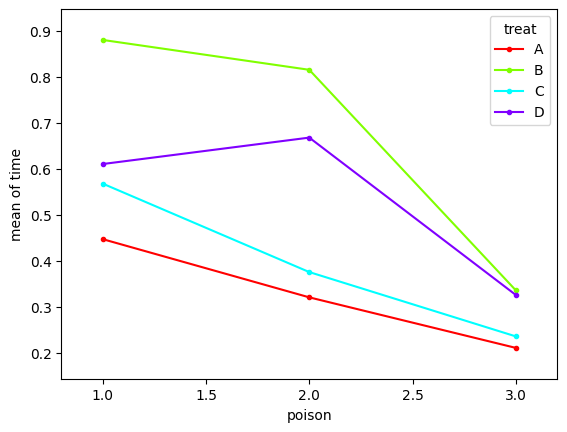


주효과
poison은 유의하지 않음
treat 유의함
poison * treat 유의하지않음 >> 상호작용 없음

결론 사후검정은 treat에 대한 것만 진행함



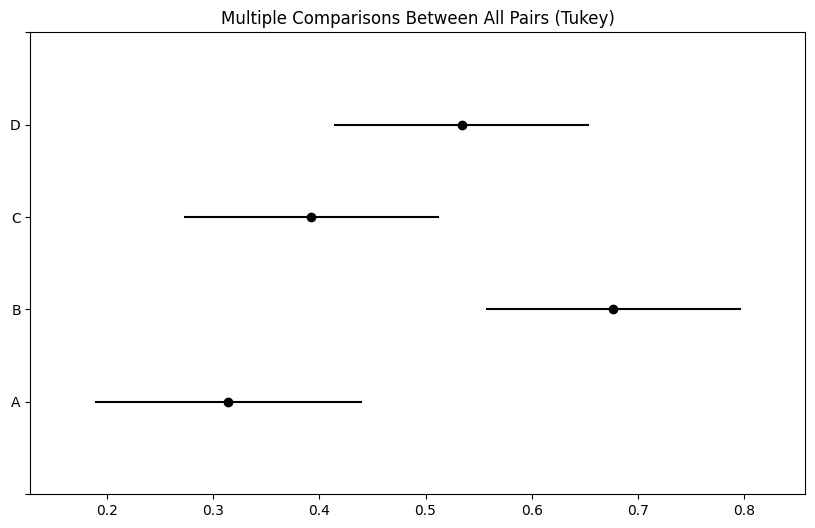

In [27]:
# 3.비모수 설계이기 때문에 typ = 3으로 진행
f = 'time ~ C(poison) * C(treat)'
model = ols(f, data = df_poison).fit()
print(anova_lm(model, typ = 3))

# 4. 교호작용
interaction_plot(df_poison['poison'] , df_poison['treat'] , df_poison['time'])
plt.show()

print('''
주효과
poison은 유의하지 않음
treat 유의함
poison * treat 유의하지않음 >> 상호작용 없음

결론 사후검정은 treat에 대한 것만 진행함
''')

tukey = pairwise_tukeyhsd(df_poison['time'], df_poison['treat'])
tukey.plot_simultaneous()
plt.show()

##### **5. 요인 3개 이상 N-way ANOVA**
1. 요인이 3개 이상일때, (GLM기반 ANOVA)

In [28]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [29]:
# 1.정규 / 등분산성 검정
cols = df[['cyl','am','gear']].columns.to_list()

res =[]
for key, group in df.groupby(cols) :
  # 샘플의 수가 3개 이상이면 이라는 가정을 주어서 정규성 검정
  if len(group) >= 3 :
    stat, p = shapiro(group['mpg'])
    s_decision = '정규분포가 아니다' if p < 0.05 else '정규분포이다'

    res.append({
        '조합' : key,
        'shapiro p_val' : p,
        'shapiro decision' : s_decision
    })

g = [group['mpg'] for name, group in df.groupby(cols)]
stat, leven_p = levene(*g)
l_decision = '등분산 아니다' if leven_p < 0.05 else '등분산이다'

res = pd.DataFrame(res)
res['Levene pval'] = leven_p
res['Levene Decision'] = l_decision
display(res)

# 현재는 샘플의 수가 적기 때문에 비모수 검정으로 진행한다.

,조합,shapiro p_val,shapiro decision,Levene pval,Levene Decision
0,"(4, 1, 4)",0.538379,정규분포이다,0.077087,등분산이다
1,"(8, 0, 3)",0.504114,정규분포이다,0.077087,등분산이다


###### ☆ 비모수 접근 일떄

In [30]:
# N-way ANOVA의 비모수 대안 - 직접구현
from statsmodels.api import stats as sm_stats
from scipy.stats import rankdata, chi2

def ray_hare(data, dv, f1, f2, f3) :
  df = data.copy()
  df['rank'] = rankdata(df[dv])
  df['factor1'] = df[f1].astype(str) + "_" + df[f2].astype(str)
  df['factor2'] = df[f1].astype(str) + "_" + df[f3].astype(str)
  df['factor3'] = df[f2].astype(str) + "_" + df[f3].astype(str)
  df['all'] = df[f1].astype(str) + "_" + df[f2].astype(str) + "_" + df[f3].astype(str)

  f = f'rank ~ C({f1}) + C({f2}) + C({f3}) + C(factor1) + C(factor2) + C(factor3) + C(all)'
  model = ols(f, data = df).fit()
  table = anova_lm(model, typ = 2)

  return table

print(ray_hare(df, dv ='mpg', f1 = 'cyl', f2 = 'am', f3 = 'gear'))


# 사후검정 - 조합별 중앙값의 차이
# 조합 생성
df['group']= df.apply(lambda x : str(x['cyl']) +"_"+ str(x['am']) + "_" +str(x['gear']), axis = 1)

res = []
for g1, g2 in combinations(df['group'].unique(),2) :
  v1 = df[df['group'] == g1]['mpg']
  v2 = df[df['group'] == g2]['mpg']

  stat, p = mannwhitneyu(v1, v2)
  res.append([v1, v2, p])

display(pd.DataFrame(res).head(4))

                 sum_sq    df          F        PR(>F)
C(cyl)       399.493322   2.0  10.728471  5.597558e-04
C(am)          0.550817   1.0   0.029585  8.650086e-01
C(gear)       17.264371   2.0   0.463638  6.349981e-01
C(factor1)  1249.399216   5.0  13.421144  4.560016e-06
C(factor2)  1473.417304   7.0  11.305403  5.155045e-06
C(factor3)    20.278060   3.0   0.363048  7.802963e-01
C(all)      2314.895833   9.0  13.814885  3.809231e-07
Residual     409.604167  22.0        NaN           NaN


,0,1,2
0,"0 21.0 1 21.0 Name: mpg, dtype: float64",2 22.8 17 32.4 18 30.4 19 33.9 25...,0.065133
1,"0 21.0 1 21.0 Name: mpg, dtype: float64","3 21.4 5 18.1 Name: mpg, dtype: float64",1.000000
2,"0 21.0 1 21.0 Name: mpg, dtype: float64",4 18.7 6 14.3 11 16.4 12 17.3 13...,0.035156
3,"0 21.0 1 21.0 Name: mpg, dtype: float64","7 24.4 8 22.8 Name: mpg, dtype: float64",0.220671


###### ☆ 모수적 접근 일떄

# n-way ANOVA 결과
                          sum_sq    df          F    PR(>F)
Intercept             462.250000   1.0  43.573301  0.000001
C(cyl)                 69.034333   2.0   3.253709  0.057825
C(am)                  58.157067   1.0   5.482088  0.028677
C(gear)                14.893778   2.0   0.701970  0.506373
C(cyl):C(am)           23.610001   2.0   1.112781  0.346447
C(cyl):C(gear)         26.775837   4.0   0.630996  0.602791
C(am):C(gear)          59.408333   2.0   2.800019  0.082536
C(cyl):C(am):C(gear)   32.090847   4.0   0.756249  0.530572
Residual              233.388333  22.0        NaN       NaN


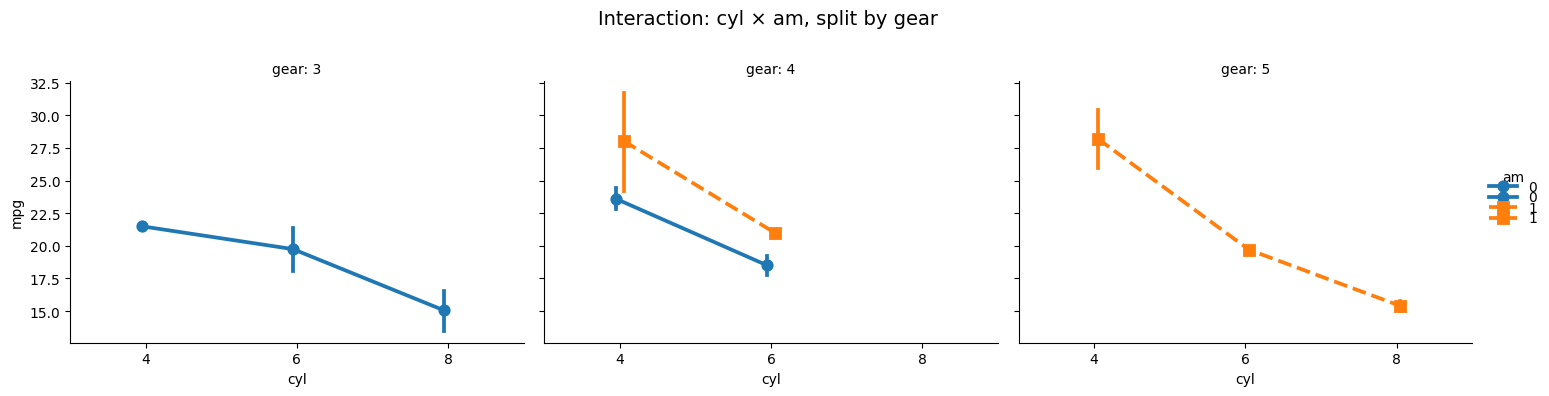

,group1,group2,meandiff,p-adj,lower,upper,reject
0,4_0_3,4_0_4,2.1000,0.9999,-11.8827,16.0827,False
1,4_0_3,4_1_4,6.5333,0.6951,-5.7983,18.8649,False
2,4_0_3,4_1_5,6.7000,0.7950,-7.2827,20.6827,False
3,4_0_3,6_0_3,-1.7500,1.0000,-15.7327,12.2327,False
4,4_0_3,6_0_4,-3.0000,0.9986,-16.9827,10.9827,False
5,4_0_3,6_1_4,-0.5000,1.0000,-14.4827,13.4827,False
6,4_0_3,6_1_5,-1.8000,1.0000,-17.9459,14.3459,False
7,4_0_3,8_0_3,-6.4500,0.6676,-18.3330,5.4330,False
8,4_0_3,8_1_5,-6.1000,0.8663,-20.0827,7.8827,False
9,4_0_4,4_1_4,4.4333,0.8015,-4.8885,13.7552,False


In [31]:
df['cyl'] = df['cyl'].astype('category')
df['am'] = df['am'].astype('category')
df['gear'] = df['gear'].astype('category')

# 1. 3요인 ANOVA
model = ols('mpg ~ C(cyl) * C(am) * C(gear)', data=df).fit()
res = sm.stats.anova_lm(model, typ=3)
print("# n-way ANOVA 결과")
print(res)

# 2. 3요인 교호작용 시각화: gear 별로 cyl x am
# interaction_plot 대체 > sns.catplot
g = sns.catplot(
    data=df, kind='point',
    x='cyl', y='mpg', hue='am',
    col='gear', dodge=True,
    height=4, aspect=1.2,
    markers=["o", "s"], linestyles=["-", "--"]
)

g.set_axis_labels("cyl", "mpg")
g.set_titles("gear: {col_name}")
g.add_legend()

plt.subplots_adjust(top=0.8)
g.fig.suptitle("Interaction: cyl × am, split by gear", fontsize=14)
plt.show()

# 3. 사후분석
tukey = pairwise_tukeyhsd(df['mpg'], df['group'])
pd.DataFrame(tukey.summary().data[1:] , columns = tukey.summary().data[0])

##### 3요인 연습해보기

In [42]:
# 요인: 학습법(A/B/C), 성별(M/F), 시간(Pre/Post)
learning = ['A', 'B', 'C']
gender = ['M', 'F']
time = ['Pre', 'Post']
# 그룹 조합 만들기
conditions = [(l, g, t) for l in learning for g in gender for t in time]

# 각 조합에 대해 점수 생성
data = []
for l, g, t in conditions:
    mean = 50
    if l == 'B': mean += 5
    if l == 'C': mean += 10
    if g == 'F': mean += 3
    if t == 'Post': mean += 5  # 시간 효과
    scores = np.random.normal(loc=mean, scale=5, size=30)
    for s in scores:
        data.append([l, g, t, s])

# DataFrame 생성
df = pd.DataFrame(data, columns=['Learning', 'Gender', 'Time', 'Score'])
print(df.head(5))
for col in df.iloc[:,0:3].columns :
  print(df[col].value_counts())

  Learning Gender Time      Score
0        A      M  Pre  56.654407
1        A      M  Pre  54.941013
2        A      M  Pre  51.161481
3        A      M  Pre  50.880905
4        A      M  Pre  44.237173
Learning
A    120
B    120
C    120
Name: count, dtype: int64
Gender
M    180
F    180
Name: count, dtype: int64
Time
Pre     180
Post    180
Name: count, dtype: int64


              조합  정규성 pvalue 정규성 Decision  등분산성 pvalue 등분산성 Decision
0   (A, F, Post)    0.349374       정규분포이다     0.137414         등분산이다
1    (A, F, Pre)    0.876144       정규분포이다     0.137414         등분산이다
2   (A, M, Post)    0.210292       정규분포이다     0.137414         등분산이다
3    (A, M, Pre)    0.509146       정규분포이다     0.137414         등분산이다
4   (B, F, Post)    0.698993       정규분포이다     0.137414         등분산이다
5    (B, F, Pre)    0.808021       정규분포이다     0.137414         등분산이다
6   (B, M, Post)    0.412920       정규분포이다     0.137414         등분산이다
7    (B, M, Pre)    0.952062       정규분포이다     0.137414         등분산이다
8   (C, F, Post)    0.342424       정규분포이다     0.137414         등분산이다
9    (C, F, Pre)    0.364887       정규분포이다     0.137414         등분산이다
10  (C, M, Post)    0.637177       정규분포이다     0.137414         등분산이다
11   (C, M, Pre)    0.599870       정규분포이다     0.137414         등분산이다
                                      sum_sq     df            F  \
Intercept                      1009

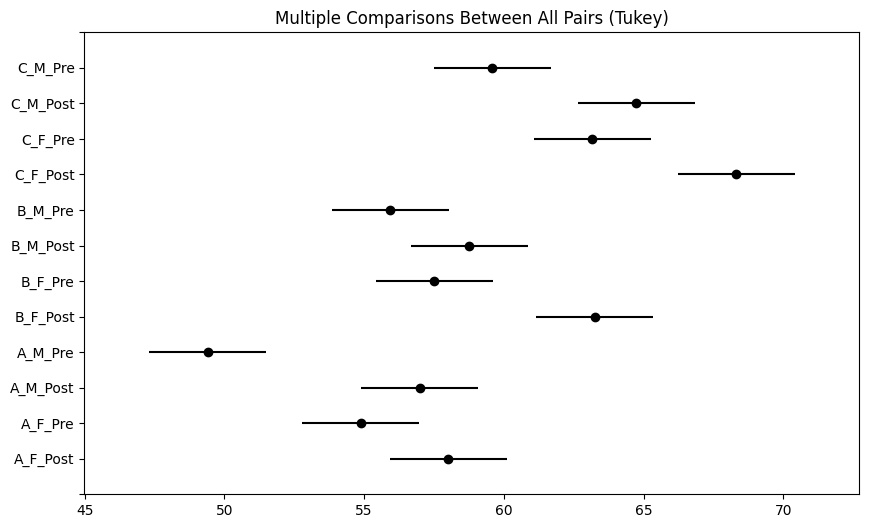

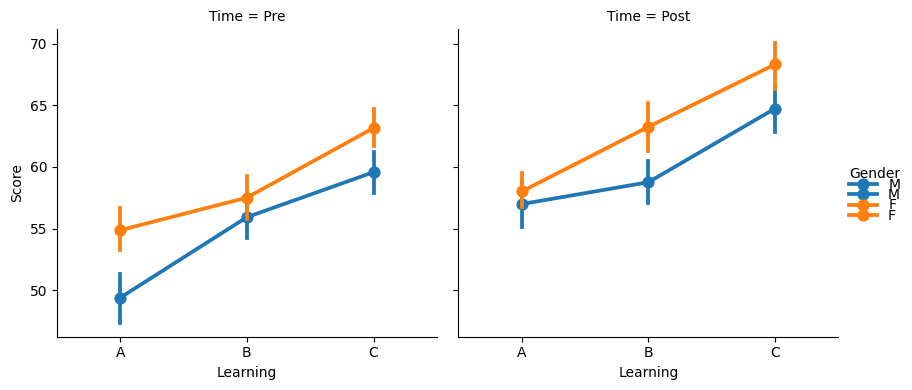

In [33]:
# 1. 정규성 등분산성
cols = ['Learning','Gender','Time']
res = []
for key, group in df.groupby(cols) :
  stat, p_val = shapiro(group['Score'])
  decision = '정규분포가 아니다' if p_val < 0.05 else '정규분포이다'

  # 시간은 Pre, Post로 나뉘므로 등분산성은 Learning × Gender 조합 간 비교
  # 1. 반복측정 - A학생이 Pre/Post 시험을 보는것 처럼 동일한 대상에서 반복 측정일떈, 등분산에서 제외
  #
  # 2. Learning x Gender는 서로 다른 사람에 대한 구성된 독립 집단 VS
  #    Time은 실험적 처리임으로 분산 동질성을 비교하지 않음
  g = [group['Score'] for name, group in df.groupby(['Learning', 'Gender'])]
  stat, leven_pval = levene(*g)
  l_decision = '등분산이 아니다' if p_val < 0.05 else '등분산이다'

  res.append({
      '조합' : key,
      '정규성 pvalue' : p_val,
      '정규성 Decision' : decision,
      '등분산성 pvalue' : leven_pval ,
      '등분산성 Decision' : l_decision
  })

print(pd.DataFrame(res))

# 2. 모델 적용
# typ = 3 : 다른 모든 요인과 교호작용 보정 후 주효과 평가 (교호작용이 포함된 모델은 항상 typ = 3사)
model = ols('Score ~ C(Learning) * C(Gender) * C(Time)', data = df).fit()
print(anova_lm(model, typ = 3))

# 3. 사후분석(Tukey HSD)
df['group'] = df['Learning'].astype(str) + '_' + df['Gender'].astype(str) + '_' + df['Time'].astype(str)
tukey = pairwise_tukeyhsd(df['Score'], df['group'], alpha = 0.05)
tukey.plot_simultaneous()

# 4. 교호작용 시각화
plot = sns.catplot(data = df,
                   kind = 'point',
                   x = 'Learning', y ='Score', hue = 'Gender',
                   col = 'Time',height=4, aspect=1)
plot.add_legend()

##### **6. MANOVA (Multivariate ANOVA)**
- 두 개 이상의 종속변수에 대해 집단간 차이를 동시에 검정
- 공분산 구조까지 고려한 통합적 검정

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/doeungim/ADP_DE2/refs/heads/main/dataset/MANOVA.csv')
df.head(3)

,Group,Gender,Math,Reading
0,A,M,72.483571,74.446943
1,A,M,73.238443,81.092119
2,A,M,68.829233,74.063452


        조합   Column   p_value shapiro decision
0   (A, F)     Math  0.061014           정규분포이다
1   (A, M)     Math  0.858634           정규분포이다
2   (B, F)     Math  0.261734           정규분포이다
3   (B, M)     Math  0.617211           정규분포이다
4   (C, F)     Math  0.715762           정규분포이다
5   (C, M)     Math  0.517452           정규분포이다
6   (A, F)  Reading  0.240752           정규분포이다
7   (A, M)  Reading  0.777097           정규분포이다
8   (B, F)  Reading  0.711762           정규분포이다
9   (B, M)  Reading  0.186657           정규분포이다
10  (C, F)  Reading  0.034909        정규분포가 아니다
11  (C, M)  Reading  0.442273           정규분포이다
                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda   0.0096 2.0000 113.0000 5824.2495 0.0000
         Pill

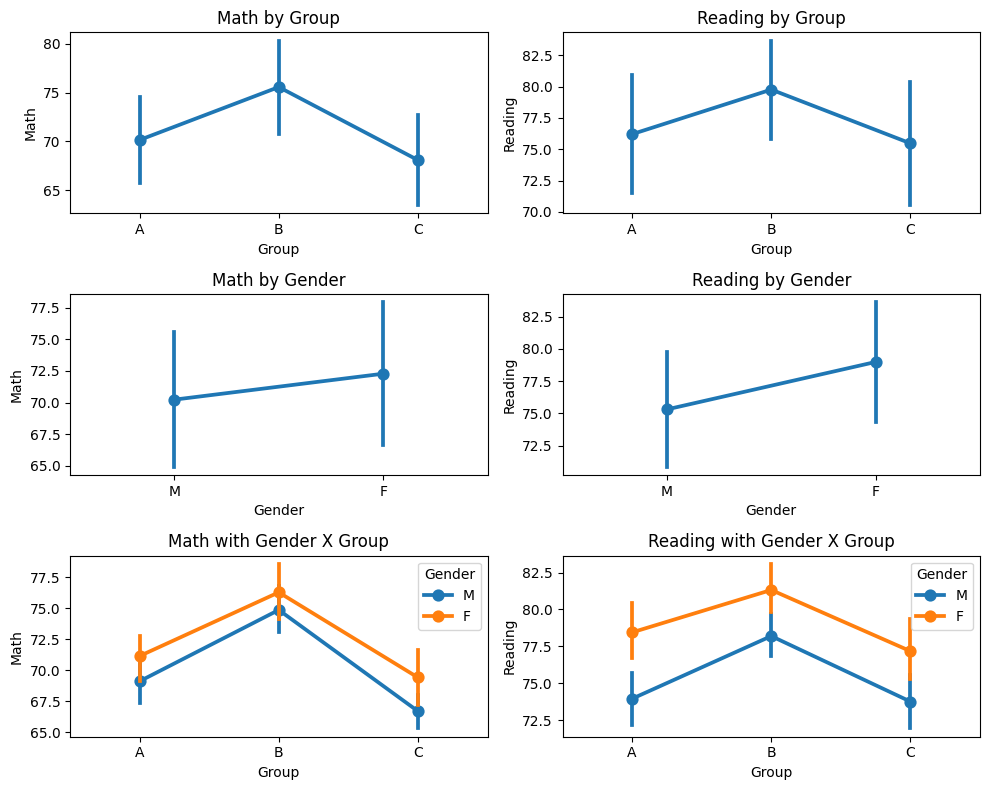

In [35]:
# 1.정규성 검정
# Group X Gender 별 Math와 Reading으로 종속변수가 2개니까 각각 조합별로 두 번 시행

res = []
for col in ['Math','Reading'] :
  for key, group in df.groupby(['Group','Gender']) :
    stat, p = shapiro(group[col])
    decision = '정규분포이다' if p > 0.05 else '정규분포가 아니다'
    res.append({
        '조합' : key,
        'Column' : col,
        'p_value' : p,
        'shapiro decision' : decision
    })

print(pd.DataFrame(res))

# 2. MANOVA 수행
from statsmodels.multivariate.manova import MANOVA
df['Group_Gender'] = df['Group'] + "_" + df['Gender']

result = MANOVA.from_formula("Math + Reading ~ Group * Gender", data = df).mv_test()
print(result)
print('Group과 Gender는 수학과 읽기 점수에 영향을 미치지만, 상호작용은 유의미하지 않다')

# 3. 사후분석
# 종속변수가 2개인 경우, 각각에 대해 ANOVA 후, Tukey HDS실시
# 주효과 (Group,. Gender)이면  > 각각에 대한 사후검정
# >> 독립변수가 (M,F)이면 ttest_ind() / (M,F,X 등)이면 ols() + TukeyHSD
from scipy.stats import ttest_ind

factors = ['Group','Gender']
y_var = ['Math','Reading']

res = []
for factor in factors :
  for var in y_var :
    cnt = df[factor].nunique()
    if cnt == 2 :
      level = df[factor].unique()

      g1 = df[df[factor] == level[0]][var]
      g2 = df[df[factor] == level[1]][var]
      stat, p_val = ttest_ind(g1,g2, equal_var = True)

      res.append({
          'Factor' : factor,
          'Y' : var,
          'T-Test pvalue' : p_val
      })

    else :
      model = ols(f"{var} ~ C({factor})", data = df).fit()
      tukey = pairwise_tukeyhsd(df[var] , df[factor])
      summary_df = pd.DataFrame(tukey._results_table.data[1:],
                                columns = tukey._results_table[0:])


print(pd.DataFrame(res))
print(summary_df)

# 주효과에 대한 시각화
fig, axes = plt.subplots(3,2, figsize = (10,8))

for i, factor in enumerate(factors) :
  for j , var in enumerate(y_var) :
    ax = axes[i][j]
    sns.pointplot(data = df, x = factor, y = var, ci = 'sd', ax = ax)
    ax.set_title(f'{var} by {factor}')


for j, var in enumerate(y_var) :
  ax = axes[2][j]
  sns.pointplot(data = df, x = 'Group', y = var, hue = 'Gender', ax = ax)
  ax.set_title(f'{var} with Gender X Group')
plt.tight_layout()
plt.show()

##### **7. ANCOVA (Analysis of Covariance)**
- ANOVA + 공변량(연속형 변수)고려
- 집단별 성적 차이를 비교하되, [공부시간(공변량)]을 보정
- Y : 1개 / X1 그룹, X2 수치형

▶ ANCOVA의 기본 가정
1. 독립성
2. 공변량과 종속변수 간 선형성
3. 종속변수와 공변량 모두 정규 분포
4. 집단 간 공분산 동질성
5. 등분산성

<모수 검증>

In [36]:
# 1. 데이터 생성
np.random.seed(42)
n = 90
group = np.random.choice(['Control', 'Treatment'], size=n)
pre_score = np.random.normal(70, 10, size=n)
treatment_effect = np.where(group == 'Treatment', 5, 0)
post_score = pre_score + treatment_effect + np.random.normal(0, 5, size=n)

df_ancova = pd.DataFrame({
    'Group': group,
    'Pre': pre_score,
    'Post': post_score
})
df = df_ancova.copy()
df.head()

,Group,Pre,Post
0,Control,57.348809,64.374835
1,Treatment,80.919923,92.881551
2,Control,97.783130,93.379926
3,Control,81.936397,82.320872
4,Control,72.186383,69.719221


,Group,Pre_Shapiro_p,Pre_Normality,Post_Shapiro_p,Post_Normality,Levene_p,Levene_Result
0,Control,0.786959,정규분포,0.846476,정규분포,0.233527,등분산
1,Treatment,0.068056,정규분포,0.154379,정규분포,0.233527,등분산


,sum_sq,df,F,PR(>F)
Group,647.869915,1.0,32.299970,1.728199e-07
Pre,7276.538571,1.0,362.776501,8.713186e-33
Residual,1745.038210,87.0,NaN,NaN



1. 공변량을 통제하기 위한 회귀선
- Pre의 영향을 제거한 후, 집단 효과(Group)의 차이만 남겨서 비교
  -> Post를 Pre의 회귀모델로 설명 한 뒤, 잔차나 보정된 평균을 이용해 그룹을 비교
  -> 어떤 반은 Pre점수가 원래 높고 어떤 반은 낮을 수 있음 Pre를 기준으로 보정된 Post의 평균을 추정한다.

2. 차트 해석
- 두 그룹의 회귀선의 기울기가 거의 평행 > Pre가 Post에 미치는 영향은 두 그룹에서 유사
- 교차되는 부분이 없는 것으로 보아 Group X Pre의 상호작용은 없음
- Pre점수를 통제해도 Treatment 그룹의 Post 점수가 더 높아, Group효과가 존재 - Group이 주효과
즉, 교육적/치료적 처치(Treatment)의 효과가 있다고 해석

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
Control Treatment   6.4771 0.0032 2.2309 10.7233   True
-------------------------------------------------------


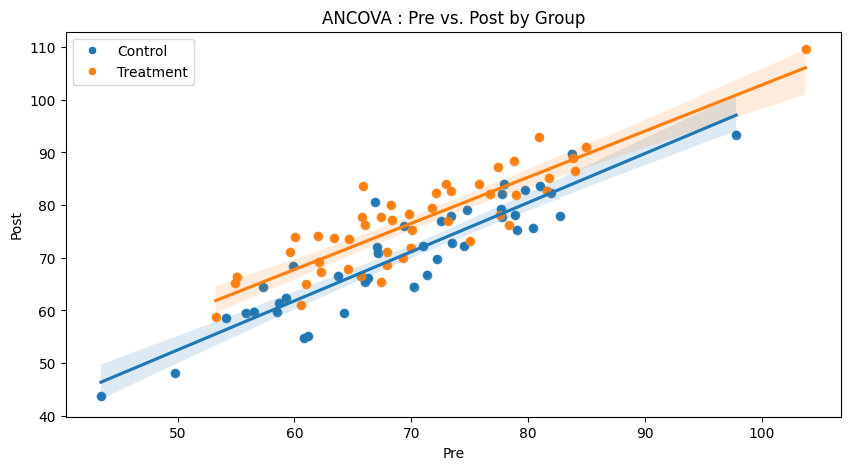

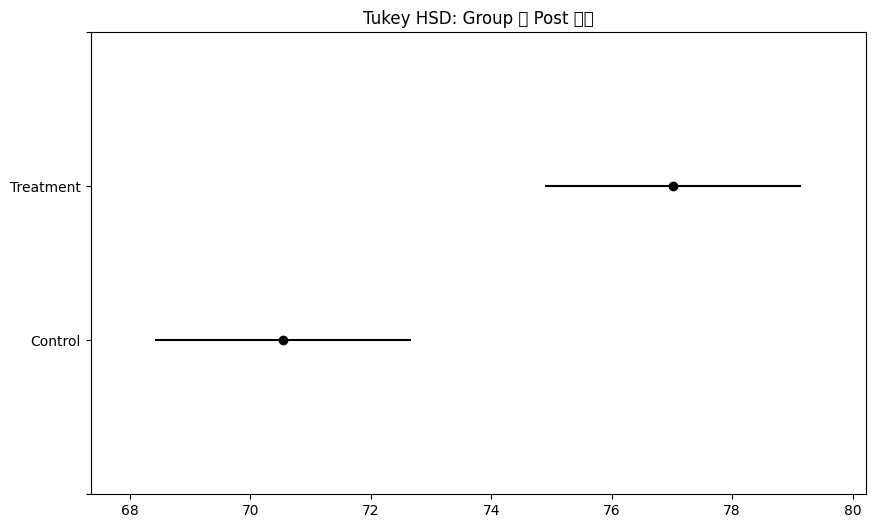

In [37]:
# ANCOA
# Post (사후점수) ~ Pre(사전점수-공변량) + Group
# 등분산 검정 : 각 그룹의 Post의 분산이 같아야한다. Pre(사전점수)는 통제되는 공변량이기 때문에
# 등분산 여부가 영향을 미치지 않음

# 1. 정규성 및 등분산성 검정
res = []
for g in df['Group'].unique().tolist() :
  pre_stat, pre_pval = shapiro(df[df['Group'] == g]['Pre'])
  post_stat, post_pval = shapiro(df[df['Group'] ==g]['Post'])

  group_post_vals  = [group['Post'] for name, group in df.groupby('Group')]
  lev_stat, lev_pval = stats.levene(* group_post_vals)

  res.append({
        'Group': g,
        'Pre_Shapiro_p': pre_pval,
        'Pre_Normality': '정규분포' if pre_pval > 0.05 else '비정규분포',
        'Post_Shapiro_p': post_pval,
        'Post_Normality': '정규분포' if post_pval > 0.05 else '비정규분포',
        'Levene_p': lev_pval,
        'Levene_Result': '등분산' if lev_pval > 0.05 else '등분산 아님'
    })

display(pd.DataFrame(res))

# 2. ANCOVA
model = ols('Post ~ Pre + Group', data = df).fit()
result = anova_lm(model,typ = 2)
display(result)


# 3.시각화 : 회귀선 포함
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'Pre', y = 'Post', hue = 'Group')
for v in df['Group'].unique() :
  sns.regplot(data = df[df['Group'] == v] , x = 'Pre', y = 'Post')
plt.title('ANCOVA : Pre vs. Post by Group')
plt.legend()
print('''
1. 공변량을 통제하기 위한 회귀선
- Pre의 영향을 제거한 후, 집단 효과(Group)의 차이만 남겨서 비교
  -> Post를 Pre의 회귀모델로 설명 한 뒤, 잔차나 보정된 평균을 이용해 그룹을 비교
  -> 어떤 반은 Pre점수가 원래 높고 어떤 반은 낮을 수 있음 Pre를 기준으로 보정된 Post의 평균을 추정한다.

2. 차트 해석
- 두 그룹의 회귀선의 기울기가 거의 평행 > Pre가 Post에 미치는 영향은 두 그룹에서 유사
- 교차되는 부분이 없는 것으로 보아 Group X Pre의 상호작용은 없음
- Pre점수를 통제해도 Treatment 그룹의 Post 점수가 더 높아, Group효과가 존재 - Group이 주효과
즉, 교육적/치료적 처치(Treatment)의 효과가 있다고 해석
''')


# Tukey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['Post'], groups=df['Group'], alpha=0.05)
print(tukey)
tukey.plot_simultaneous()
plt.title('Tukey HSD: Group 간 Post 차이')
plt.show()

                sum_sq    df           F        PR(>F)
Group      3869.367077   1.0   22.846592  7.076734e-06
pre_rank  41231.540820   1.0  243.450717  6.074343e-27
Residual  14734.579912  87.0         NaN           NaN


<Figure size 1000x400 with 0 Axes>

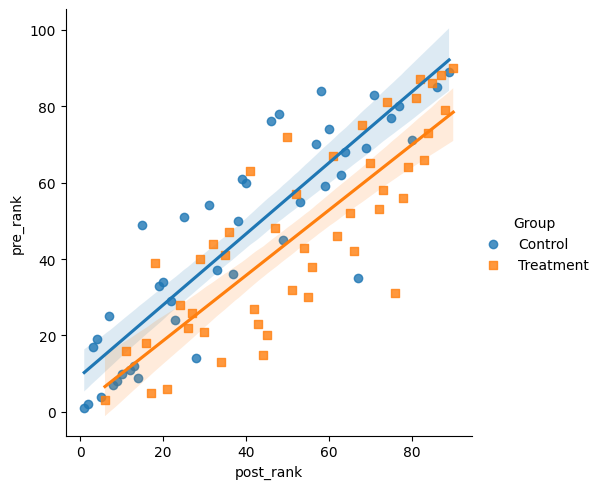

In [38]:
#<비모수적 대안>
# Rank ANOCOVA - 종속변수와 공변량을 모두 순위화해서 ANCOVA수행
#  정규성 가정 없이도 공변량의 영향을 제거하고 집단 효과를 검정
import statsmodels.formula.api as smf

# 순위화
df['post_rank'] = rankdata(df['Post'])
df['pre_rank'] = rankdata(df['Pre'])

m =smf.ols('post_rank ~ pre_rank + Group', data = df).fit()
res = anova_lm(m, typ = 2)
print(res)

plt.figure(figsize = (10, 4))
sns.lmplot(data = df , x = 'post_rank', y = 'pre_rank' , hue = 'Group' , markers = ['o','s'])
plt.show()

##### **8. MANCOVA (Multivariate ANCOVA)**
- Y1, Y2 를 공변량(X)를 통제한 후, 그룹의 효과 검정

<모수 가정>
1. Y1, Y2의 그룹별 정규성
2. Box`s M 종속변수간 공분산 행렬의 동질성


In [44]:
#!pip install palmerpenguins
from palmerpenguins import load_penguins

df = load_penguins().dropna(subset=['species','bill_length_mm','bill_depth_mm','flipper_length_mm'])
df = df.rename(columns={'species':'Group','bill_length_mm':'Covar','bill_depth_mm':'Y1','flipper_length_mm':'Y2'})
df.head(4)

# Group : species
# Covarinace : Covar - bill_length_mm
# Y1, Y2

,Group,island,Covar,Y1,Y2,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


,Group,Y,Shapiro Pval,Shapiro Decision,Levene Pval_Y1,Levene Decision_Y1,Levene Pval_Y2,Levene Decision_Y2
0,Adelie,Y1,0.092490,정규분포이다,0.132021,등분산이다,0.718751,등분산이다
1,Adelie,Y2,0.720047,정규분포이다,0.132021,등분산이다,0.718751,등분산이다
2,Gentoo,Y1,0.027695,정규분포가아니다,0.132021,등분산이다,0.718751,등분산이다
3,Gentoo,Y2,0.001620,정규분포가아니다,0.132021,등분산이다,0.718751,등분산이다
4,Chinstrap,Y1,0.141785,정규분포이다,0.132021,등분산이다,0.718751,등분산이다
5,Chinstrap,Y2,0.810645,정규분포이다,0.132021,등분산이다,0.718751,등분산이다



1) Group
H0 : Group는 Y1,Y2에 함께 유의한 효과가 없다
H1 : 적어도 하나의 Y변수에 그룹 효과가 있다.

2) Covariance
H0 : Covar는 Y들에 유의한 영향이 없다
H1 : 공변량 효과 존재

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.2091 2.0000 337.0000 637.1622 0.0000
          Pillai's trace 0.7909 2.0000 337.0000 637.1622 0.0000
  Hotelling-Lawley trace 3.7814 2.0000 337.0000 637.1622 0.0000
     Roy's greatest root 3.7814 2.0000 337.0000 637.1622 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         Group          Value  Num DF  Den DF   F Value  Pr > F
---------------------------------------------------------

<Axes: xlabel='Covar', ylabel='Y2'>

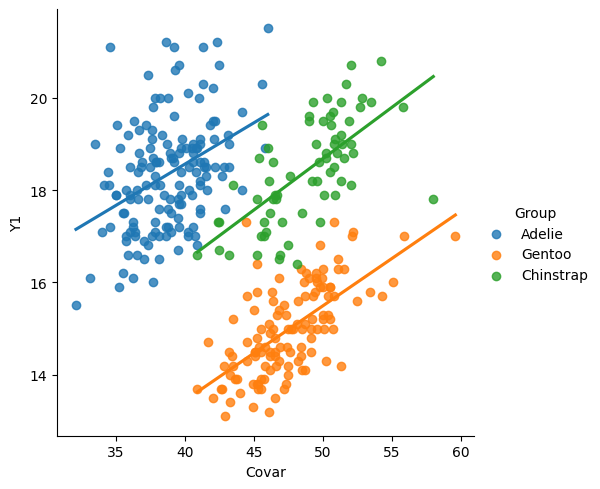

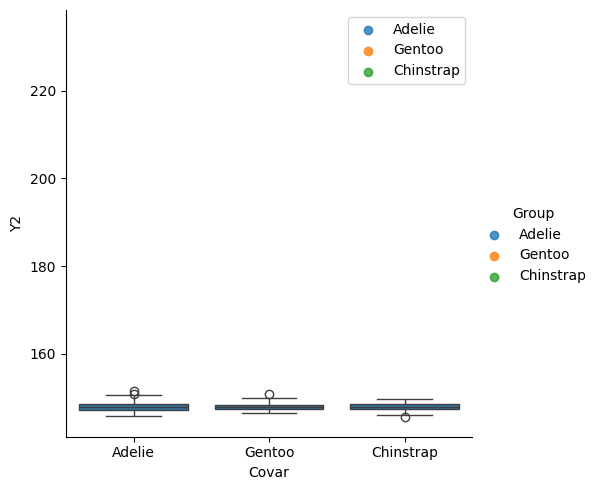

In [45]:
## 1. 정규성, 등분산성 검증
# Group별 Y1, Y2의 정규성

res =[]
for group in df['Group'].unique() :
  for y in ['Y1','Y2'] :
    stat, pval = shapiro(df[df['Group'] == group][y])

    res.append({
        'Group' : group,
        'Y' : y ,
        'Shapiro Pval' : pval,
        'Shapiro Decision' : '정규분포이다' if pval > 0.05 else '정규분포가아니다' ,
    })

# Perform Levene's test once for each variable across all groups
leven_group_Y1 = [group['Y1'].values for name, group in df.groupby('Group')]
stat_Y1, leven_pval_Y1 = stats.levene(*leven_group_Y1)
leven_decision_Y1 = '등분산이다' if leven_pval_Y1 > 0.05 else '등분산이 아니다'

leven_group_Y2 = [group['Y2'].values for name, group in df.groupby('Group')]
stat_Y2, leven_pval_Y2 = stats.levene(*leven_group_Y2)
leven_decision_Y2 = '등분산이다' if leven_pval_Y2 > 0.05 else '등분산이 아니다'


# Add Levene's test results to the results list
res_df = pd.DataFrame(res)
res_df['Levene Pval_Y1'] = leven_pval_Y1
res_df['Levene Decision_Y1'] = leven_decision_Y1
res_df['Levene Pval_Y2'] = leven_pval_Y2
res_df['Levene Decision_Y2'] = leven_decision_Y2

display(res_df)


# 2. 가설설정
print('''
1) Group
H0 : Group는 Y1,Y2에 함께 유의한 효과가 없다
H1 : 적어도 하나의 Y변수에 그룹 효과가 있다.

2) Covariance
H0 : Covar는 Y들에 유의한 영향이 없다
H1 : 공변량 효과 존재
''')

# Clear the variable C from the environment to avoid conflict with patsy's C()
if 'C' in globals():
    del C

# 3. 모수적 MANCOVA
from statsmodels.multivariate.manova import MANOVA
f = 'Y1 + Y2 ~ Covar + Group'
manova = MANOVA.from_formula(f, data=df)
print(manova.mv_test())

# 4. 사후분석 (종속변수별 ANCOVA + Tukey HSD)
# Y1
y1 = smf.ols('Y1~ Covar + C(Group)',data = df).fit()
res1 = anova_lm(y1, typ = 2)
tukey_y1 = pairwise_tukeyhsd(df['Y1'] , df['Group'])
print(tukey_y1)

# Y2
y2 = smf.ols('Y2 ~ Covar + C(Group)', data = df).fit()
res2 = anova_lm(y2, typ=2)
tukey_y2 = pairwise_tukeyhsd(df['Y2'], df['Group'])
print(tukey_y2)

# 회귀선
sns.lmplot(data=df, x='Covar', y='Y1', hue='Group', ci=None)
sns.lmplot(data=df, x='Covar', y='Y2', hue='Group', ci=None)

# Boxplot of adjusted means (잔차 기반)
df['Y1_adj'] = y1.resid + y2.params['Intercept']
sns.boxplot(data=df, x='Group', y='Y1_adj')

##### **9. Mixed ANOVA (혼합 설계)**
- 2개 중 1개는 독립측정, 나머지 하나는 반복 측정일때,
- Genotype : 1 [독립] Between Subjects
- Before/After : 1 [반복] Within-Subjects

In [69]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/mixedanova.csv")
df.head()

,id,genotype,before,after
0,1,A,1.53,4.08
1,2,A,1.83,4.84
2,3,A,1.38,4.26
3,4,A,1.92,4.35
4,5,A,1.30,4.79


In [70]:
df_melt = pd.melt(
                  df.reset_index() ,
                  id_vars =['id','genotype'] ,
                  value_vars = ['before', 'after'] ,
                  var_name = 'Time' , value_name = 'yield'
)
df_melt.head(5)
# genotype : between suject 요인
# TIme : within subest 요인
# yeld : 종속변수

,id,genotype,Time,yield
0,1,A,before,1.53
1,2,A,before,1.83
2,3,A,before,1.38
3,4,A,before,1.92
4,5,A,before,1.30


In [77]:
#!pip install pingouin
# 정규성 - Genotype + Time의 조합별로 정규성 검증
res = []
df_melt['combo']= df_melt['genotype'] + '_' + df_melt['Time']
print(df_melt.head(4))
for key, group in df_melt.groupby('combo') :
  stat, p_val = shapiro(group['yield'])

  res.append({
      '조합' : key,
      'pvalue' : p_val,
      'Decision' : '정규분포이다' if p_val > 0.05 else '정규분포가 아니다',
  })
res = pd.DataFrame(res)

g = [group['yield'] for name, group in df_melt.groupby('combo')]
stat, leven_p = levene(* g)

res['leven_pval'] = leven_p
res

   id genotype    Time  yield     combo
0   1        A  before   1.53  A_before
1   2        A  before   1.83  A_before
2   3        A  before   1.38  A_before
3   4        A  before   1.92  A_before


,조합,pvalue,Decision,leven_pval
0,A_after,0.362694,정규분포이다,0.286802
1,A_before,0.461201,정규분포이다,0.286802
2,B_after,0.687226,정규분포이다,0.286802
3,B_before,0.396233,정규분포이다,0.286802
4,C_after,0.054206,정규분포이다,0.286802
5,C_before,0.784187,정규분포이다,0.286802



Group 간 yield 평균 차이가 없음 
Time : Before, After간 평균 차이 없음
Interaction : 상호작용 없음 (두 요인이 독립적)



,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,genotype,10.242987,2,12,5.121493,16.351889,3.741297e-04,0.731566,NaN
1,Time,31.868213,1,12,31.868213,373.404574,2.083410e-10,0.968864,1.0
2,Interaction,4.100347,2,12,2.050173,24.022184,6.371677e-05,0.800148,NaN


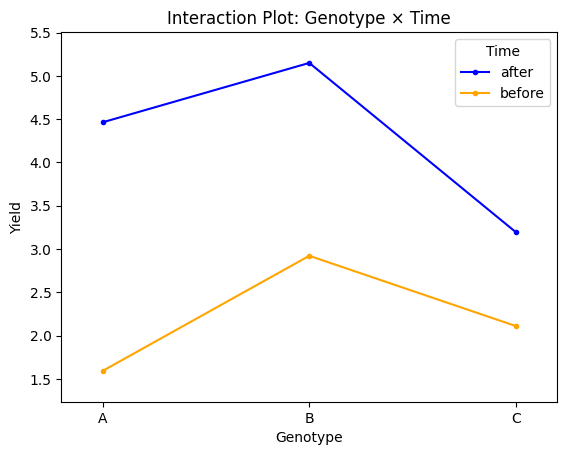


POST HOC TESTS

Contrast         Time    A      B       Paired    Parametric         T     dof  alternative      p-unc    p-corr  p-adjust         BF10    hedges
---------------  ------  -----  ------  --------  ------------  ------  ------  -------------  -------  --------  ----------  ---------  --------
Time             -       after  before  True      True           9.331  14.000  two-sided        0.000   nan      nan         69270.000     2.427
genotype         -       A      B       False     True          -3.390   8.000  two-sided        0.009     0.028  sidak           5.399    -1.937
genotype         -       A      C       False     True           3.020   8.000  two-sided        0.017     0.049  sidak           3.726     1.725
genotype         -       B      C       False     True           4.775   8.000  two-sided        0.001     0.004  sidak          21.200     2.728
Time * genotype  after   A      B       False     True          -1.810   8.000  two-sided        0.108     

In [85]:
print('''
Group 간 yield 평균 차이가 없음
Time : Before, After간 평균 차이 없음
Interaction : 상호작용 없음 (두 요인이 독립적)
''')

aov = pg.mixed_anova(
    dv='yield', between='genotype',
    within='Time', subject='id',
    data=df_melt, correction=False, effsize='np2'
)
display(aov)

fig = interaction_plot(
    x=df_melt['genotype'], trace=df_melt['Time'],
    response=df_melt['yield'], colors=['blue','orange']
)
plt.title('Interaction Plot: Genotype × Time')
plt.xlabel('Genotype')
plt.ylabel('Yield')
plt.show()

# 사후분석
post = pg.pairwise_tests(
    data=df_melt, dv='yield',
    between='genotype', within='Time',
    subject='id', padjust='sidak'
)
pg.print_table(post)